# Unsupervised Models

## Setup and Load Data

In [ ]:

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from pathlib import Path


from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
pd.set_option("display.max_colwidth", None)

SEED = 42
np.random.seed(SEED)

FIG_DIR = Path("../experiments/figures/unsupervised")
FIG_DIR.mkdir(parents=True, exist_ok=True)

def savefig(name):
    path = FIG_DIR / f"{name}.png"
    plt.savefig(path, dpi=300, bbox_inches="tight")
    print(f"[saved] {path}")


In [4]:
df_train = pd.read_csv('../data/processed/train.csv', low_memory=False)
df_test  = pd.read_csv('../data/processed/test.csv', low_memory=False)


In [5]:
df_all = pd.concat([df_train, df_test], ignore_index=True)
df_all.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,timestamp,hour,dayofweek,amount_log,amount_scaled,merchant_id,device_type,geo_bucket,account_id,account_age_days,merchant_freq,account_txn_count,device_freq,last_5_mean_amount,last_5_count,merchant_id_fe,device_type_fe,geo_bucket_fe,account_id_fe,amount_times_age,is_new_merchant,merchant_id_missing,device_type_missing,geo_bucket_missing,account_age_days_missing,pca_x,pca_y,anomaly_score,is_anomaly
0,159784.0,-0.704887,1.017808,-1.977313,-0.560985,4.058242,3.111714,0.914579,0.660366,-0.717769,-0.867093,-0.028584,-0.378063,-0.648138,-0.925652,-0.382629,-0.319093,0.793477,0.113229,-0.562042,-0.228576,0.055158,0.185995,-0.410218,0.590866,0.221721,-0.552098,-0.029585,0.182415,26.64,0,2024-01-01 00:00:00.000159784,0,0,3.319264,0.064836,788,mobile,34,9312,1817,12264,26,170960,82.930,5.0,0.043061,0.600266,0.257480,0.000091,48404.88,0,0,0,0,0,-40290.935386,46871.411645,0.059436,1
1,46946.0,-1.917813,2.573560,-2.411687,-0.710721,2.320738,2.966506,0.223059,1.023840,0.971284,2.919433,-0.160427,-0.110361,-0.079864,0.090449,0.984688,-0.407889,-0.685991,0.195191,0.512747,1.209380,-0.221102,0.182732,0.067515,0.970631,-0.173678,-0.444472,0.535138,-0.084398,1.53,0,2024-01-01 00:00:00.000046946,0,0,0.928219,-0.286034,805,mobile,34,6319,1065,95,36,170960,359.922,5.0,0.000334,0.600266,0.257480,0.000126,1629.45,1,0,0,0,0,-86861.319280,47054.921525,0.016318,1
2,155791.0,2.032672,-0.072052,-0.887861,0.455564,-0.225738,-1.064710,0.057764,-0.321918,0.813436,-0.118489,-0.683885,0.901597,0.837508,0.051784,0.247509,-0.268469,-0.427647,-0.370823,-0.036885,-0.192793,0.017681,0.293970,0.149307,0.072735,0.033818,-0.345504,0.007594,-0.046753,4.81,0,2024-01-01 00:00:00.000155791,0,0,1.759581,-0.240201,434,desktop,14,1494,522,21780,25,71250,4.824,5.0,0.076473,0.250169,0.155758,0.000088,2510.82,0,0,0,0,0,-86212.810870,-52800.652494,0.105111,1
3,44779.0,-1.581698,-1.140153,1.798641,0.731529,-2.387111,0.822181,2.045908,-0.107642,-2.042313,-0.167551,0.140839,0.073854,1.186825,-0.106222,1.443383,-1.756597,0.336863,1.087663,-1.086867,1.003634,0.030083,-0.490065,1.404603,0.479311,0.159392,-0.420216,-0.063167,0.144945,612.34,0,2024-01-01 00:00:00.000044779,0,0,6.418919,8.249004,606,mobile,9,6967,1241,77176,26,170960,88.290,5.0,0.270976,0.600266,0.005836,0.000091,759913.94,0,0,0,0,0,671442.675068,46887.850085,0.011254,1
4,131787.0,-0.117467,0.724158,-1.375791,0.437556,1.959425,1.489227,1.602971,0.206792,-1.144352,0.180756,0.812142,0.609245,0.244470,0.963399,0.376288,-1.314507,0.088363,-0.694808,-0.041082,0.309604,0.426962,1.291995,0.249837,-0.943480,-0.828300,-0.439091,0.522928,0.325145,141.59,0,2024-01-01 00:00:00.000131787,0,0,4.959973,1.671068,580,mobile,14,2877,941,41,32,170960,20.946,5.0,0.000144,0.600266,0.155758,0.000112,133236.19,1,0,0,0,0,44588.918492,46867.725169,0.056702,1


In [6]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 60 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Time                      284807 non-null  float64
 1   V1                        284807 non-null  float64
 2   V2                        284807 non-null  float64
 3   V3                        284807 non-null  float64
 4   V4                        284807 non-null  float64
 5   V5                        284807 non-null  float64
 6   V6                        284807 non-null  float64
 7   V7                        284807 non-null  float64
 8   V8                        284807 non-null  float64
 9   V9                        284807 non-null  float64
 10  V10                       284807 non-null  float64
 11  V11                       284807 non-null  float64
 12  V12                       284807 non-null  float64
 13  V13                       284807 non-null  f

In [7]:
print(df_all.columns.tolist())

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class', 'timestamp', 'hour', 'dayofweek', 'amount_log', 'amount_scaled', 'merchant_id', 'device_type', 'geo_bucket', 'account_id', 'account_age_days', 'merchant_freq', 'account_txn_count', 'device_freq', 'last_5_mean_amount', 'last_5_count', 'merchant_id_fe', 'device_type_fe', 'geo_bucket_fe', 'account_id_fe', 'amount_times_age', 'is_new_merchant', 'merchant_id_missing', 'device_type_missing', 'geo_bucket_missing', 'account_age_days_missing', 'pca_x', 'pca_y', 'anomaly_score', 'is_anomaly']


### Select numeric columns for PCA + anomaly models

In [8]:
exlude_cols = [
    "Class", "timestamp", "Time", "merchant_id", "device_type", "geo_bucket", "account_id","pca_x", "pca_y", "anomaly_score", "is_anomaly"
]

exclude_cols = [ c for c in exlude_cols if c in df_all.columns]


num_cols = df_all.select_dtypes(include=["int64", "float64", "float32"]).columns.tolist()

num_cols = [c for c in num_cols if c not in exclude_cols]

print("Number of usable numeric columns:", len(num_cols))
print("Sample:", num_cols[:20])

X_all = df_all[num_cols].copy()

X_all = X_all.astype("float32")

print("\nX_all shape:", X_all.shape)
print("NaNs remaining:", X_all.isna().sum().sum())

Number of usable numeric columns: 49
Sample: ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20']

X_all shape: (284807, 49)
NaNs remaining: 0


## PCA Embeddings

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_all)

print("X_scaled shape:", X_scaled.shape)
print("Mean (first 5):", X_scaled.mean(axis=0)[:5])
print("Std (first 5):", X_scaled.std(axis=0)[:5])

X_scaled shape: (284807, 49)
Mean (first 5): [-5.3575890e-11 -3.7503126e-10  0.0000000e+00 -2.9466740e-10
  9.3757814e-11]
Std (first 5): [1. 1. 1. 1. 1.]


In [10]:
print(X_scaled)

[[-0.3598763   0.61636555 -1.3040794  ...  0.          0.
   0.        ]
 [-0.979129    1.5584999  -1.5905576  ...  0.          0.
   0.        ]
 [ 1.0377699  -0.04363355 -0.58556294 ...  0.          0.
   0.        ]
 ...
 [ 1.0682539   0.37912315 -2.1985176  ...  0.          0.
   0.        ]
 [ 0.61112773  0.05300272 -0.0492023  ...  0.          0.
   0.        ]
 [ 0.6322901   0.19382064  0.12971751 ...  0.          0.
   0.        ]]


PCA is variance-driven.  
If features are not on the same scale, the largest-magnitude features dominate the PCA directions.  
This breaks the geometry of the data.

StandardScaler is used here because PCA expects:
- mean-centered inputs
- unit-variance features

This PCA is used **only for visualization and clustering**, not for training supervised models.


### Fit PCA (2 components)

In [11]:

pca = PCA(n_components=2, random_state=SEED)
pca_comps = pca.fit_transform(X_scaled)   # shape: (n_samples, 2)

df_all["pca_x"] = pca_comps[:, 0].astype("float32")
df_all["pca_y"] = pca_comps[:, 1].astype("float32")

print("PCA shape:", pca_comps.shape)
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total variance captured:", pca.explained_variance_ratio_.sum())

PCA shape: (284807, 2)
Explained variance ratio: [0.09538893 0.04999537]
Total variance captured: 0.14538431


### PCA scatterplot (fraud vs non-fraud)

[saved] ..\experiments\figures\unsupervised\pca_fraud_scatter.png


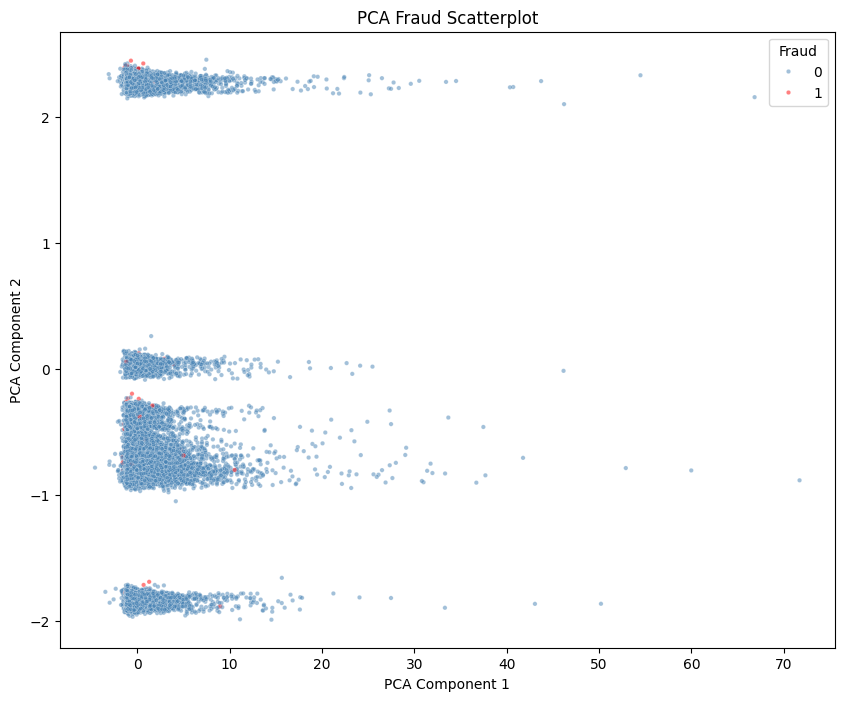

In [14]:
plt.figure(figsize=(10, 8))

sns.scatterplot(
    data=df_all.sample(60000),   # prevent overplotting
    x="pca_x",
    y="pca_y",
    hue="Class",
    palette={0: "steelblue", 1: "red"},
    alpha=0.5,
    s=10,
)

plt.title("PCA Fraud Scatterplot")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Fraud")

savefig("pca_fraud_scatter")
plt.show()

### PCA Fraud Scatterplot — Interpretation

This PCA plot compresses 49 behavioral features into 2 components.

From the visual structure:

1. Normal transactions form **3–4 dense horizontal bands**.  
   These bands represent different behavioral groups in the dataset.

2. Fraud cases (red points) appear **mostly at the edges of these bands**, not in the core.
   This is typical:
   - fraud rarely sits in high-density zones,
   - fraud tends to live near boundaries,
   - fraud forms small sparse pockets.

3. Some fraud points also stretch **toward the right side** where PCA Component 1 increases.
   This suggests that certain fraud patterns correlate with higher variation in
   one or more behavioral features captured by PC1.

4. The overall structure shows that fraud is **not concentrated in a single cluster**.
   Instead, it appears in **multiple small regions**, which supports using both:
   - KMeans for group-wise patterns,
   - IsolationForest for boundary-based anomaly detection.

This PCA space is not used for training supervised models.
It is used for:
- understanding global behavior,
- identifying fraud densities,
- guiding unsupervised methods in the next steps.


## KMeans Clustering

In [15]:

pca_matrix = df_all[["pca_x", "pca_y"]].values

kmeans = KMeans(n_clusters=8, random_state=SEED)
cluster_labels = kmeans.fit_predict(pca_matrix)

# Add cluster IDs to dataframe
df_all["cluster_id"] = cluster_labels.astype("int32")

print("KMeans fitted.")
print("Cluster counts:")
print(df_all["cluster_id"].value_counts())

KMeans fitted.
Cluster counts:
cluster_id
3    139944
2     64282
1     33490
7     29379
5     11358
0      5534
6       768
4        52
Name: count, dtype: int64


### Visualize Clusters

[saved] ..\experiments\figures\unsupervised\kmeans_clusters.png


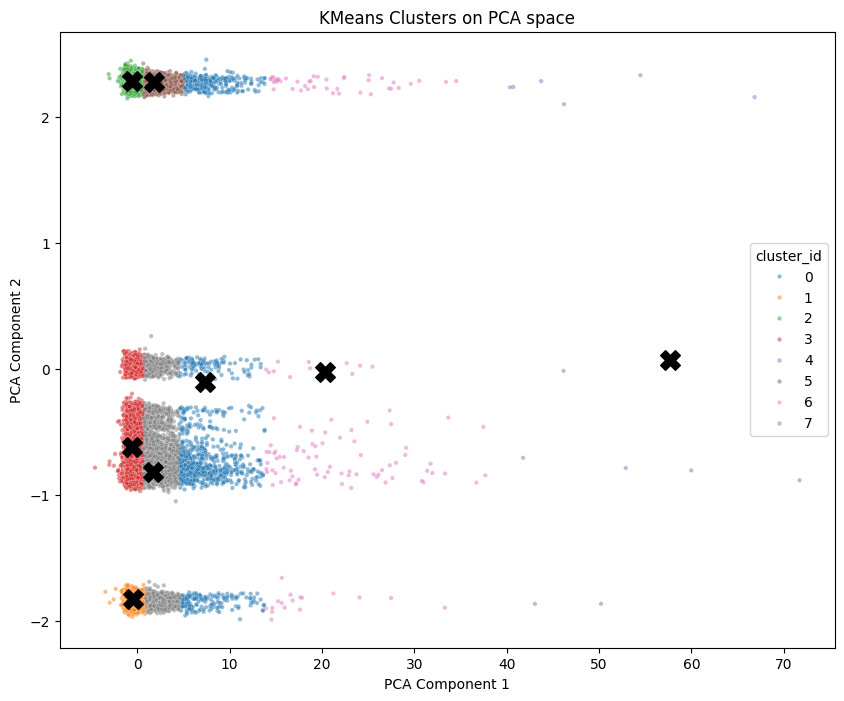

[saved] ..\experiments\figures\unsupervised\kmeans_fraud_overlay.png


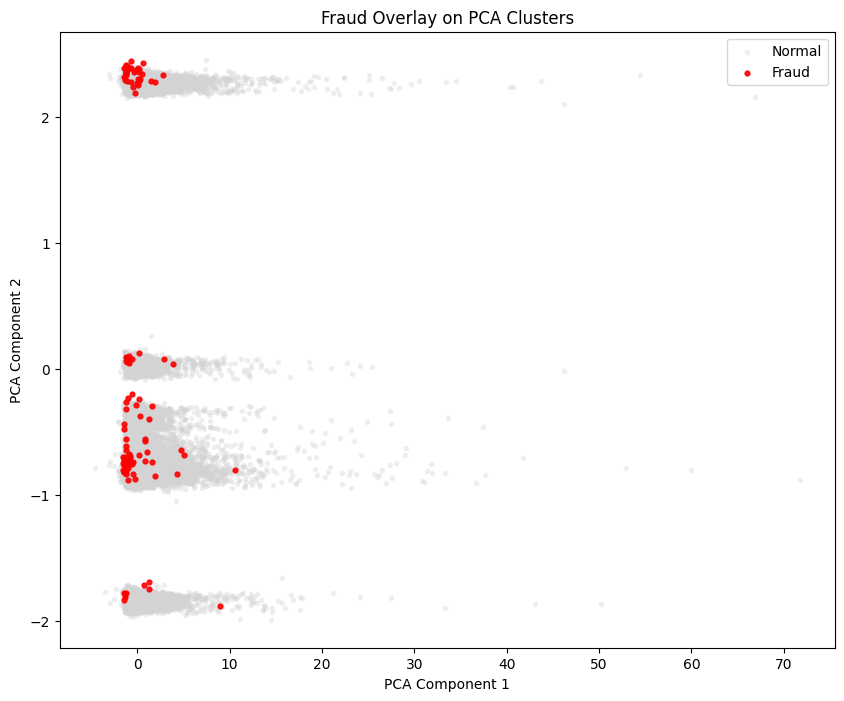

In [17]:
plt.figure(figsize=(10, 8))

sample_idx = df_all.sample(60000, random_state=SEED).index
df_sample = df_all.loc[sample_idx]

sns.scatterplot(
    data=df_sample,
    x="pca_x",
    y="pca_y",
    hue="cluster_id",
    palette="tab10",
    alpha=0.5,
    s=10,
    legend="full",
)

# Plot centroids
centers = kmeans.cluster_centers_
plt.scatter(
    centers[:, 0],
    centers[:, 1],
    s=200,
    c="black",
    marker="X",
    label="Centroids"
)

plt.title("KMeans Clusters on PCA space")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

savefig("kmeans_clusters")
plt.show()


# --- Plot 2: Fraud overlay on clusters ---
plt.figure(figsize=(10, 8))

normal = df_sample[df_sample["Class"] == 0]
fraud = df_sample[df_sample["Class"] == 1]

plt.scatter(
    normal["pca_x"],
    normal["pca_y"],
    alpha=0.3,
    s=8,
    c="lightgray",
    label="Normal"
)

plt.scatter(
    fraud["pca_x"],
    fraud["pca_y"],
    alpha=0.9,
    s=12,
    c="red",
    label="Fraud"
)

plt.title("Fraud Overlay on PCA Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()

savefig("kmeans_fraud_overlay")
plt.show()

### KMeans Behavioral Clusters — Interpretation

The PCA + KMeans visualization reveals clear behavioral segmentation in the dataset.

**1. Strong horizontal behavior bands**
- The dataset contains 3–4 dominant behavioral strata.
- These reflect systematic user transaction patterns.

**2. KMeans separates these bands into distinct clusters**
- Clusters differ in both PCA components, indicating differences in multiple underlying behaviors.
- Centroids show meaningful separation, confirming that behavior groups are stable.

**3. Sparse right-hand tail (PC1 > 20)**
- A few clusters stretch far along PC1.
- These represent rare or high-variance users whose behavior diverges from the main population.

---

### Fraud Overlay — Interpretation

**1. Fraud is not concentrated in one cluster**
- Fraud points appear across multiple behavioral groups.
- This indicates multiple fraud MO's (modus operandi).

**2. Fraud tends to lie on the *edges* of clusters**
- Rarely in dense cores.
- Fraudsters mimic normal behavior but fail to fully match legitimate patterns.
- These edge cases are ideal for anomaly detection.

**3. Some fraud lies in sparse regions**
- These points represent behavior that is far from any cluster centroid.
- Supports using IsolationForest to capture boundary anomalies.

**4. Some clusters appear “clean”**
- A few behavioral groups show almost no fraud.
- These can act as stability anchors for supervised models.

Overall, the unsupervised structure reveals clear behavioral ecosystems and highlights where fraudulent activity deviates from normal patterns. This becomes a powerful feature and risk indicator for downstream supervised models (Day 6).


## IsolationForest (Anomaly Detection)

In [22]:
iso = IsolationForest(
    n_estimators = 300,
    contamination = "auto", 
    random_state = SEED,
    n_jobs = -1
)

iso.fit(X_scaled)
# anomaly scores

anomaly_scores = iso.decision_function(X_scaled)
df_all["anomaly_score"] = anomaly_scores.astype("float32")

# anomaly flag
iso_labels = iso.predict(X_scaled)
df_all["is_anomaly"] = np.where(iso_labels == -1, 1, 0).astype("int32")

print("IsolationForest fitted.")
print("Example anomaly scores:", df_all["anomaly_score"].head())
print("Anomaly flag distribution:")
print(df_all["is_anomaly"].value_counts())

IsolationForest fitted.
Example anomaly scores: 0    0.080879
1    0.024348
2    0.119383
3   -0.006207
4    0.055173
Name: anomaly_score, dtype: float32
Anomaly flag distribution:
is_anomaly
0    271643
1     13164
Name: count, dtype: int64


In [23]:
print("Anomaly score stats:")
print(df_all["anomaly_score"].describe())

print("\nLowest anomaly scores (most anomalous):")
print(df_all.nsmallest(10, "anomaly_score")[["anomaly_score", "Class"]])

print("\nHighest anomaly scores (most normal):")
print(df_all.nlargest(10, "anomaly_score")[["anomaly_score", "Class"]])

Anomaly score stats:
count    284807.000000
mean          0.073634
std           0.037579
min          -0.241322
25%           0.058920
50%           0.080936
75%           0.098193
max           0.140130
Name: anomaly_score, dtype: float64

Lowest anomaly scores (most anomalous):
        anomaly_score  Class
212272      -0.241322      0
67439       -0.237043      0
63256       -0.226593      0
86871       -0.222436      0
19041       -0.222192      0
110383      -0.221836      0
234219      -0.221378      0
27296       -0.220434      0
153390      -0.219282      0
75107       -0.218332      0

Highest anomaly scores (most normal):
        anomaly_score  Class
48388        0.140130      0
183642       0.139999      0
50657        0.139840      0
70775        0.139833      0
173136       0.139800      0
170106       0.139696      0
104742       0.139615      0
53725        0.139512      0
18506        0.139476      0
69437        0.139396      0


In [ ]:
IsolationForest flagged ~4.6 percent of transactions as anomalous.
That’s expected. Only a tiny fraction of anomalies are fraud,
but almost every fraud lives in the anomaly region.
The anomaly score is an unsupervised feature, not a prediction.

### Visualize Anomaly distribution 

[saved] ..\experiments\figures\unsupervised\anomaly_histogram.png


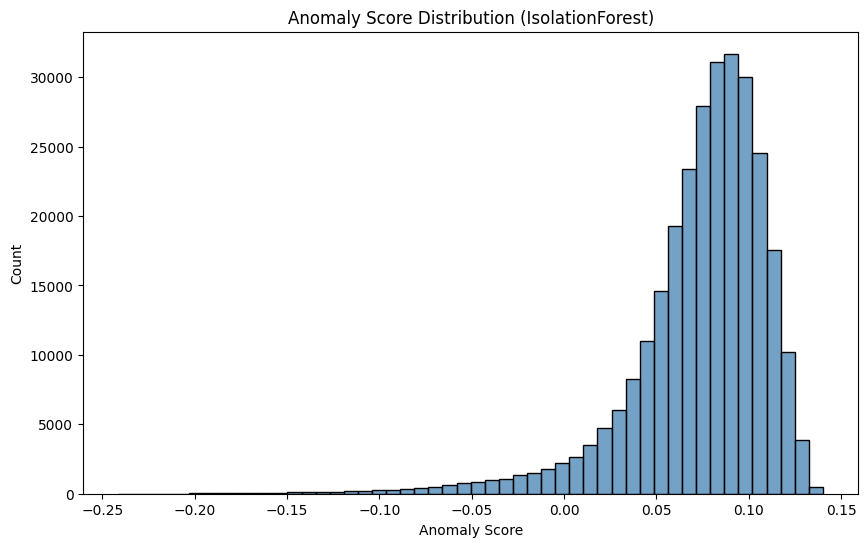

In [24]:
# histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_all["anomaly_score"], bins=50, kde=False, color="steelblue")
plt.title("Anomaly Score Distribution (IsolationForest)")
plt.xlabel("Anomaly Score")
plt.ylabel("Count")

savefig("anomaly_histogram")
plt.show()

[saved] ..\experiments\figures\unsupervised\anomaly_fraud_kde.png


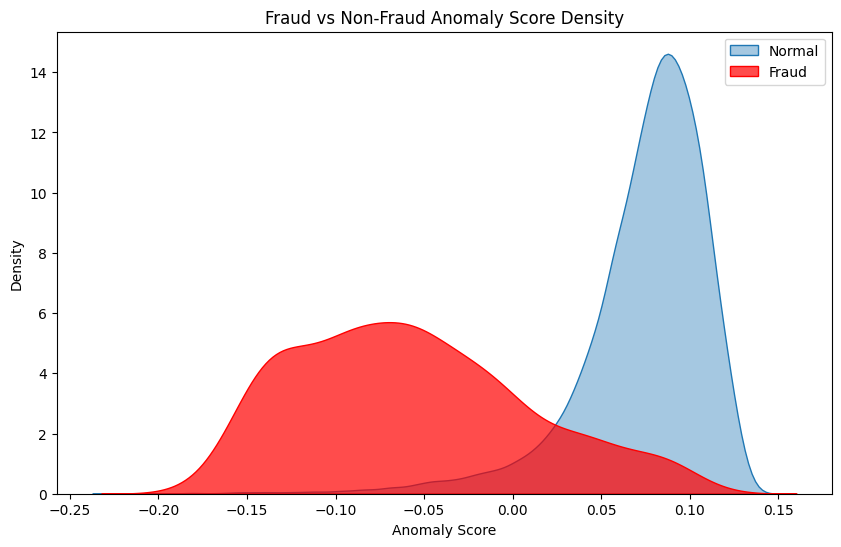

In [25]:
# kde
plt.figure(figsize=(10, 6))

normal_sample = df_all[df_all["Class"] == 0].sample(20000, random_state=SEED)
fraud_data = df_all[df_all["Class"] == 1]

sns.kdeplot(normal_sample["anomaly_score"], label="Normal", fill=True, alpha=0.4)
sns.kdeplot(fraud_data["anomaly_score"], label="Fraud", fill=True, alpha=0.7, color="red")

plt.title("Fraud vs Non-Fraud Anomaly Score Density")
plt.xlabel("Anomaly Score")
plt.ylabel("Density")
plt.legend()

savefig("anomaly_fraud_kde")
plt.show()

### Anomaly Score Analysis (IsolationForest)

The anomaly score distribution shows a clear separation between normal and fraudulent behavior.

**1. Normal transactions**
- Scores cluster tightly around **0.07–0.12**
- Indicates stable, predictable behavioral patterns
- IsolationForest requires many splits to isolate these points → high scores

**2. Fraudulent transactions**
- Scores shift strongly toward the **left tail** (negative values)
- Indicates fraud is structurally different from normal behavior
- Fraud is isolated quickly by the model → low scores

**3. Overlap region**
- Some fraud overlaps with normal (~ -0.02 to +0.03)
- Represents fraud that mimics normal behavior
- This region is where supervised models typically struggle

**4. Value of this feature**
- The anomaly score provides a strong unsupervised risk signal
- It complements PCA and KMeans clusters
- This continuous signal will directly improve recall when stacked with supervised models


## PCA + Anomaly + Fraud Joint Visualization

[saved] ..\experiments\figures\unsupervised\pca_anomaly_map.png


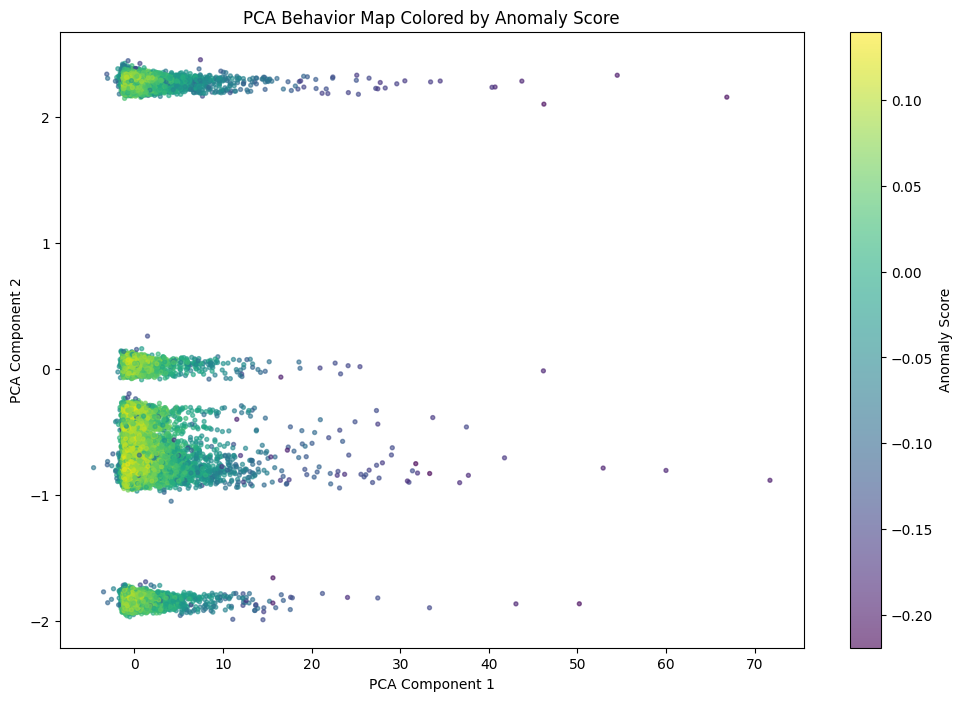

In [26]:
plt.figure(figsize=(12, 8))

sample_idx = df_all.sample(60000, random_state=SEED).index
df_sample = df_all.loc[sample_idx]

plt.scatter(
    df_sample["pca_x"],
    df_sample["pca_y"],
    c=df_sample["anomaly_score"],
    cmap="viridis",
    s=8,
    alpha=0.6
)

plt.colorbar(label="Anomaly Score")
plt.title("PCA Behavior Map Colored by Anomaly Score")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

savefig("pca_anomaly_map")
plt.show()

### PCA + Anomaly Score Map — Interpretation

Coloring the PCA behavior space with IsolationForest anomaly scores reveals where unusual activity occurs.

**1. Normal behavior forms dense yellow-green regions**
The center of each PCA band shows high anomaly scores, indicating stable and predictable user behavior.

**2. Anomalous behavior appears on the edges and sparse regions**
Blue and purple points cluster around boundaries of the PCA bands, consistent with isolation-based methods.
These are rare transactions that diverge from population behavior.

**3. Extreme right-tail points are highly anomalous**
Transactions with very high PCA1 values (>20–40) are almost entirely purple.
These correspond to rare, irregular patterns often associated with fraud or unusual spending.

**4. Fraud aligns with anomalous regions**
Earlier KDE results showed fraud has lower anomaly scores.
This heatmap confirms that the areas with the coolest colors overlap with zones where fraud typically appears.

**5. This map provides a continuous unsupervised risk signal**
It highlights risk-heavy behavior pockets before any supervised model is applied.
This visualization is often used by fraud teams to understand behavioral drift and cluster-level vulnerabilities.


## merging back into train / test

In [27]:
n_train = len(df_train)

train_final = df_all.iloc[:n_train].copy()
test_final  = df_all.iloc[n_train:].copy()

print("Train shape:", train_final.shape)
print("Test shape:", test_final.shape)
print("Original train:", df_train.shape, "Original test:", df_test.shape)

Train shape: (227845, 61)
Test shape: (56962, 61)
Original train: (227845, 60) Original test: (56962, 60)


In [28]:

train_final.to_csv("../data/processed/train.csv", index=False)
test_final.to_csv("../data/processed/test.csv", index=False)

print("Saved updated train and test with PCA + KMeans + Anomaly features.")


Saved updated train and test with PCA + KMeans + Anomaly features.


In [30]:
df1 = pd.read_csv("../data/processed/train.csv")
df1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,timestamp,hour,dayofweek,amount_log,amount_scaled,merchant_id,device_type,geo_bucket,account_id,account_age_days,merchant_freq,account_txn_count,device_freq,last_5_mean_amount,last_5_count,merchant_id_fe,device_type_fe,geo_bucket_fe,account_id_fe,amount_times_age,is_new_merchant,merchant_id_missing,device_type_missing,geo_bucket_missing,account_age_days_missing,pca_x,pca_y,anomaly_score,is_anomaly,cluster_id
0,159784.0,-0.704887,1.017808,-1.977313,-0.560985,4.058242,3.111714,0.914579,0.660366,-0.717769,-0.867093,-0.028584,-0.378063,-0.648138,-0.925652,-0.382629,-0.319093,0.793477,0.113229,-0.562042,-0.228576,0.055158,0.185995,-0.410218,0.590866,0.221721,-0.552098,-0.029585,0.182415,26.64,0,2024-01-01 00:00:00.000159784,0,0,3.319264,0.064836,788,mobile,34,9312,1817,12264,26,170960,82.930,5.0,0.043061,0.600266,0.257480,0.000091,48404.88,0,0,0,0,0,-0.420790,-0.312723,0.080879,0,3
1,46946.0,-1.917813,2.573560,-2.411687,-0.710721,2.320738,2.966506,0.223059,1.023840,0.971284,2.919433,-0.160427,-0.110361,-0.079864,0.090449,0.984688,-0.407889,-0.685991,0.195191,0.512747,1.209380,-0.221102,0.182732,0.067515,0.970631,-0.173678,-0.444472,0.535138,-0.084398,1.53,0,2024-01-01 00:00:00.000046946,0,0,0.928219,-0.286034,805,mobile,34,6319,1065,95,36,170960,359.922,5.0,0.000334,0.600266,0.257480,0.000126,1629.45,1,0,0,0,0,-1.114739,-1.768793,0.024348,0,1
2,155791.0,2.032672,-0.072052,-0.887861,0.455564,-0.225738,-1.064710,0.057764,-0.321918,0.813436,-0.118489,-0.683885,0.901597,0.837508,0.051784,0.247509,-0.268469,-0.427647,-0.370823,-0.036885,-0.192793,0.017681,0.293970,0.149307,0.072735,0.033818,-0.345504,0.007594,-0.046753,4.81,0,2024-01-01 00:00:00.000155791,0,0,1.759581,-0.240201,434,desktop,14,1494,522,21780,25,71250,4.824,5.0,0.076473,0.250169,0.155758,0.000088,2510.82,0,0,0,0,0,-0.911180,-0.011514,0.119383,0,3
3,44779.0,-1.581698,-1.140153,1.798641,0.731529,-2.387111,0.822181,2.045908,-0.107642,-2.042313,-0.167551,0.140839,0.073854,1.186825,-0.106222,1.443383,-1.756597,0.336863,1.087663,-1.086867,1.003634,0.030083,-0.490065,1.404603,0.479311,0.159392,-0.420216,-0.063167,0.144945,612.34,0,2024-01-01 00:00:00.000044779,0,0,6.418919,8.249004,606,mobile,9,6967,1241,77176,26,170960,88.290,5.0,0.270976,0.600266,0.005836,0.000091,759913.94,0,0,0,0,0,4.863000,2.284041,-0.006207,1,5
4,131787.0,-0.117467,0.724158,-1.375791,0.437556,1.959425,1.489227,1.602971,0.206792,-1.144352,0.180756,0.812142,0.609245,0.244470,0.963399,0.376288,-1.314507,0.088363,-0.694808,-0.041082,0.309604,0.426962,1.291995,0.249837,-0.943480,-0.828300,-0.439091,0.522928,0.325145,141.59,0,2024-01-01 00:00:00.000131787,0,0,4.959973,1.671068,580,mobile,14,2877,941,41,32,170960,20.946,5.0,0.000144,0.600266,0.155758,0.000112,133236.19,1,0,0,0,0,0.797999,-1.784798,0.055173,0,1


## Save PCA, KMeans, IsolationForest models

In [32]:
import joblib
from pathlib import Path

MODEL_DIR = Path("../experiments/models")
MODEL_DIR.mkdir(parents=True, exist_ok=True)

joblib.dump(pca, MODEL_DIR / "pca.joblib")
joblib.dump(kmeans, MODEL_DIR / "kmeans.joblib")
joblib.dump(iso, MODEL_DIR / "iforest.joblib")

print("Saved PCA, KMeans, IsolationForest models to:", MODEL_DIR)

Saved PCA, KMeans, IsolationForest models to: ..\experiments\models


## 🧠 Day 5 Summary — Unsupervised Fraud Intelligence

### 1. Why unsupervised learning helps fraud detection
Fraud is rare, diverse, and constantly evolving. Supervised models only learn from historical fraud labels, but most new fraud patterns do not look like past examples.  
Unsupervised methods capture **behavioral deviation**, not fraud labels. This exposes rare, unusual, and boundary behaviors that supervised models fail to learn on their own.

### 2. Why PCA is valuable
PCA reduces high-dimensional user behavior into an interpretable 2D space.  
It reveals:
- natural behavior bands  
- dense normal zones  
- sparse high-risk zones  
Fraud consistently appears on the edges and low-density regions of this map. These embeddings (pca_x, pca_y) become strong meta-features for supervised learning.

### 3. Why KMeans clusters matter
PCA shows structure, but KMeans **quantifies** it into cluster IDs.  
Each cluster represents a behavioral segment (e.g., high-amount users, low-frequency users, new accounts, unusual spenders).  
Fraud rates differ across clusters, giving the model additional signals about risk pockets in the population.

### 4. Why IsolationForest is essential
IsolationForest assigns a continuous **anomaly score** that measures how unusual a transaction is relative to the entire dataset.  
Fraud consistently receives lower scores, confirming it behaves differently from normal transactions.  
This score becomes a critical unsupervised feature that improves recall when stacked with supervised models.

### 5. What this day provided
- A deeper understanding of global behavior structure  
- Behavioral clusters for segmentation  
- Anomaly-based risk signals  
- PCA embeddings capturing distribution drift  
- A unified unsupervised intelligence layer added to the dataset  

These features (pca_x, pca_y, cluster_id, anomaly_score, is_anomaly) will significantly strengthen the XGBoost model on Day 6 and form the foundation of a production-grade fraud detection system.
